In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pennylane as qml
import csv
import tensorflow

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam

In [34]:
variables = ['E_0', 'PX_0', 'PY_0', 'PZ_0', 
             'E_1', 'PX_1', 'PY_1', 'PZ_1',
             'E_2', 'PX_2', 'PY_2', 'PZ_2',
             'E_3', 'PX_3', 'PY_3', 'PZ_3', 'is_signal_new' ]

trainData = pd.read_csv('train_16_feature.csv')
valData = pd.read_csv('val_16_feature.csv')
testData = pd.read_csv('test_16_feature.csv')

trainData


,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,PY_2,PZ_2,E_3,PX_3,PY_3,PZ_3,is_signal_new
0,474.07114,-250.347030,-223.651960,-334.738100,103.23624,-48.866222,-56.790775,-71.025490,105.255570,-55.415000,-49.968887,-74.236270,40.176777,-21.760696,-18.717611,-28.112215,0
1,150.50453,120.062390,76.852005,-48.274265,82.25706,63.801740,42.754807,-29.454842,48.573560,36.763200,26.990648,-16.714146,47.044415,36.609283,24.497763,-16.516570,0
2,251.64539,10.427651,-147.573750,203.564880,104.14780,10.718256,-54.497948,88.101395,78.043210,5.724113,-43.421295,64.595430,60.968952,3.972102,-34.616955,50.031010,0
3,451.56613,129.885440,-99.066290,-420.984100,208.41092,59.033960,-46.177090,-194.467940,190.183300,54.069675,-41.686220,-177.506100,165.955810,46.956554,-37.322773,-154.736620,0
4,399.09390,-168.432080,-47.205597,-358.717440,273.69196,-121.926940,-30.803854,-243.088930,152.837220,-44.400204,-23.385914,-144.363900,85.448845,-25.207611,-13.659453,-80.495346,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,647.53140,-89.893166,-276.679840,578.501830,254.00922,-35.625706,-108.153946,227.055530,159.797780,-21.488913,-64.530940,144.600520,143.896160,-19.292950,-62.284770,128.275090,0
1996,444.35030,-51.091473,-163.282600,-410.092220,452.53513,-37.122696,-157.140880,-422.748960,136.446820,-11.405325,-47.015656,-127.582054,128.630840,-7.893148,-40.468987,-121.843570,0
1997,132.14104,39.046600,-110.300320,-61.404040,104.95194,27.105830,-84.270550,-56.379585,75.513626,50.208890,-44.831950,-34.226772,34.107933,20.924997,-22.358770,-15.019354,0
1998,392.75980,-346.321040,-162.306560,89.322784,70.96233,-60.510414,-33.200523,16.488422,44.565620,-39.236280,-18.529053,10.162843,15.047664,-13.359625,-5.651700,4.001361,0


In [35]:
valData

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,PY_2,PZ_2,E_3,PX_3,PY_3,PZ_3,is_signal_new
0,266.67688,85.227500,-227.714480,109.539700,145.654130,46.856384,-124.277214,59.789430,76.116646,24.653267,-64.709310,31.601667,22.791922,7.481191,-19.669860,8.752145,0
1,385.80774,82.459040,303.009900,-224.127500,107.484184,15.370172,85.792786,-62.898380,69.148740,14.434706,54.469550,-40.078120,55.611130,12.197320,43.766777,-32.067000,0
2,144.53531,-108.092530,93.247640,-22.612755,70.963295,-21.669872,46.335262,-49.185867,56.287310,-19.737480,36.743510,-37.796925,37.790607,-28.543318,24.203964,-5.251385,0
3,82.66848,49.805250,-9.679499,-65.267320,58.262596,38.636460,-7.670141,-42.929283,59.068157,37.110703,-7.712214,-45.303036,51.755386,32.184956,-6.917750,-39.936120,0
4,406.58173,186.811080,-345.960570,103.545180,42.170246,19.375856,-35.882680,10.739602,36.417843,12.717323,-32.662610,9.883466,27.428343,9.705414,-24.498070,7.613377,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,164.97522,9.094282,-163.747680,-17.911253,84.298260,3.582494,-83.684630,-9.499778,61.293360,7.513807,-60.482693,-6.500996,35.686380,2.377598,-34.909885,-7.011735,0
496,150.12228,103.024230,-80.103210,74.203674,104.575516,77.903520,-50.784140,47.833576,96.141770,71.433430,-45.192226,45.805744,91.310980,67.824850,-43.924915,42.521606,0
497,509.01120,119.784800,119.603280,-480.040680,221.632450,52.034190,51.781425,-209.122130,178.402400,41.350250,42.275230,-168.316300,170.820180,40.088593,40.537180,-161.025380,0
498,213.91803,-41.228820,106.823510,-180.692690,206.889450,-45.542534,94.903660,-178.107880,122.337746,-23.219300,61.370320,-103.252464,113.770810,-21.267216,56.848873,-96.227380,0


In [36]:
testData

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,PY_2,PZ_2,E_3,PX_3,PY_3,PZ_3,is_signal_new
0,218.36424,-172.341860,110.129105,-76.503624,153.661120,-111.320465,93.167970,-50.390713,76.708050,-56.523700,46.127293,-23.695349,64.181670,-47.419117,38.768340,-19.176275,0
1,122.23876,26.738468,-91.614000,76.382225,121.227135,17.644758,-93.015450,75.715300,90.420105,21.377417,-68.010970,55.617530,37.324345,6.616175,-30.158524,20.971321,0
2,383.77230,-97.906456,79.640710,-362.426360,200.625990,-54.921326,37.994343,-189.184750,123.247220,-33.828953,23.792858,-116.100730,129.766570,-30.538094,23.642555,-123.886310,0
3,132.49275,-77.763950,-87.322600,-62.304600,83.946594,-49.450480,-53.823605,-41.288010,28.072624,-19.964916,-17.656641,-8.815749,30.558174,-17.897005,-19.654710,-15.072874,0
4,730.78700,-209.120010,-193.454320,-672.973900,225.477330,-75.363350,-66.226990,-201.926650,217.040190,-63.698190,-55.967525,-199.791440,57.056023,-18.407139,-19.030806,-50.541027,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,133.66800,-95.052400,1.588900,-93.966210,74.132010,-56.045840,6.037781,-48.145237,52.330830,-41.220825,2.094786,-32.170967,32.251910,-31.500904,3.657942,-5.873524,1
496,127.02285,-115.595720,-52.315495,5.960197,123.453340,-79.312780,-85.206825,-41.109695,54.011642,-49.152690,-22.245176,2.534347,42.885870,-37.833218,-19.908659,-3.389836,1
497,123.73967,-101.162530,-14.452067,69.776690,113.407295,-92.500990,-12.243360,64.458374,53.692240,-44.576572,-2.486476,29.826218,41.706340,-33.080128,-17.543074,18.367489,1
498,476.48047,8.692999,143.278550,-454.344940,201.043180,-17.187027,73.768420,-186.228870,201.661330,5.497776,60.906776,-192.165120,158.064030,5.799703,49.117060,-150.126980,1


In [37]:
scaler = StandardScaler()
scaler.fit(pd.concat([trainData,testData]))
trainData[variables[:-1]] = np.arctan(trainData[variables[:-1]])
valData[variables[:-1]] = np.arctan(valData[variables[:-1]])
testData[variables[:-1]] = np.arctan(testData[variables[:-1]])
trainData

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,PY_2,PZ_2,E_3,PX_3,PY_3,PZ_3,is_signal_new
0,1.568687,-1.566802,-1.566325,-1.567809,1.561110,-1.550335,-1.553190,-1.556718,1.561296,-1.552753,-1.550787,-1.557327,1.545911,-1.524874,-1.517421,-1.535240,0
1,1.564152,1.562468,1.557785,-1.550084,1.558640,1.555124,1.547411,-1.536859,1.550212,1.543602,1.533763,-1.511038,1.549543,1.543488,1.529999,-1.510325,0
2,1.566823,1.475190,-1.564020,1.565884,1.561195,1.477767,-1.552449,1.559446,1.557984,1.397842,-1.547770,1.555317,1.554396,1.324166,-1.541917,1.550811,0
3,1.568582,1.563097,-1.560702,-1.568421,1.565998,1.553859,-1.549144,-1.565654,1.565538,1.552304,-1.546812,-1.565163,1.564771,1.549503,-1.544009,-1.564334,0
4,1.568291,-1.564859,-1.549616,-1.568009,1.567143,-1.562595,-1.538344,-1.566683,1.564254,-1.548278,-1.528062,-1.563869,1.559094,-1.531147,-1.497717,-1.558374,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.569252,-1.559672,-1.567182,1.569068,1.566859,-1.542734,-1.561551,1.566392,1.564538,-1.524294,-1.555301,1.563881,1.563847,-1.519010,-1.554742,1.563001,0
1996,1.568546,-1.551226,-1.564672,-1.568358,1.568587,-1.543865,-1.564433,-1.568431,1.563468,-1.483342,-1.549530,-1.562958,1.563022,-1.444776,-1.546091,-1.562589,0
1997,1.563229,1.545191,-1.561730,-1.554512,1.561268,1.533921,-1.558930,-1.553061,1.557554,1.550882,-1.548495,-1.541588,1.541486,1.523043,-1.526101,-1.504314,0
1998,1.568250,-1.567909,-1.564635,1.559601,1.556705,-1.554272,-1.540685,1.510222,1.548361,-1.545315,-1.516879,1.472714,1.504438,-1.496083,-1.395671,1.325898,0


In [38]:
valData

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,PY_2,PZ_2,E_3,PX_3,PY_3,PZ_3,is_signal_new
0,1.567046,1.559064,-1.566405,1.561667,1.563931,1.549458,-1.562750,1.554073,1.557659,1.530256,-1.555344,1.539163,1.526949,1.437915,-1.520001,1.457032,0
1,1.568204,1.558670,1.567496,-1.566335,1.561493,1.505827,1.559141,-1.554899,1.556336,1.501629,1.552440,-1.545850,1.552816,1.488994,1.547952,-1.539622,0
2,1.563878,-1.561545,1.560073,-1.526602,1.556705,-1.524682,1.549218,-1.550468,1.553032,-1.520175,1.543587,-1.544345,1.544341,-1.535776,1.529504,-1.382623,0
3,1.558700,1.550721,-1.467850,-1.555476,1.553634,1.544920,-1.441152,-1.547506,1.553868,1.543856,-1.441851,-1.548726,1.551477,1.539736,-1.427235,-1.545762,0
4,1.568337,1.565443,-1.567906,1.561139,1.547087,1.519231,-1.542935,1.477951,1.543344,1.492325,-1.540190,1.469960,1.534354,1.468123,-1.529999,1.440196,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.564735,1.461277,-1.564689,-1.515023,1.558934,1.298590,-1.558847,-1.465917,1.554483,1.438486,-1.554264,-1.418170,1.542782,1.172665,-1.542159,-1.429134,0
496,1.564135,1.561090,-1.558313,1.557321,1.561234,1.557961,-1.551108,1.549894,1.560395,1.556798,-1.548672,1.548968,1.559845,1.556054,-1.548034,1.547283,0
497,1.568832,1.562448,1.562436,-1.568713,1.566284,1.551581,1.551487,-1.566014,1.565191,1.546617,1.547146,-1.564855,1.564942,1.545857,1.546133,-1.564586,0
498,1.566122,-1.546546,1.561435,-1.565262,1.565963,-1.548842,1.560260,-1.565182,1.562622,-1.527755,1.554503,-1.561112,1.562007,-1.523810,1.553208,-1.560405,0


In [39]:
testData

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,PY_2,PZ_2,E_3,PX_3,PY_3,PZ_3,is_signal_new
0,1.566217,-1.564994,1.561716,-1.557726,1.564289,-1.561813,1.560063,-1.550954,1.557761,-1.553106,1.549121,-1.528619,1.555217,-1.549711,1.545008,-1.518696,0
1,1.562616,1.533414,-1.559881,1.557705,1.562548,1.514183,-1.560046,1.557590,1.559737,1.524052,-1.556094,1.552818,1.544011,1.420787,-1.537650,1.523148,0
2,1.568191,-1.560583,1.558241,-1.568037,1.565812,-1.552590,1.544483,-1.565511,1.562683,-1.541244,1.528792,-1.562183,1.563090,-1.538062,1.528525,-1.562725,0
3,1.563249,-1.557938,-1.559345,-1.554748,1.558885,-1.550577,-1.552219,-1.546581,1.535189,-1.520750,-1.514221,-1.457846,1.538084,-1.514979,-1.519962,-1.504549,0
4,1.569428,-1.566014,-1.565627,-1.569310,1.566361,-1.557528,-1.555698,-1.565844,1.566189,-1.555099,-1.552931,-1.565791,1.553271,-1.516523,-1.518298,-1.551013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.563315,-1.560276,1.009063,-1.560155,1.557308,-1.552956,1.406663,-1.550029,1.551689,-1.546542,1.125411,-1.539722,1.539800,-1.539062,1.303939,-1.402158,1
496,1.562924,-1.562146,-1.551684,1.404565,1.562696,-1.558189,-1.559061,-1.546476,1.552284,-1.550454,-1.525873,1.194972,1.547483,-1.544371,-1.520609,-1.283933,1
497,1.562715,-1.560912,-1.501712,1.556466,1.561979,-1.559986,-1.489300,1.555284,1.552174,-1.548367,-1.188416,1.537281,1.546824,-1.540576,-1.513855,1.516406,1
498,1.568698,1.456265,1.563817,-1.568595,1.565822,-1.512678,1.557241,-1.565427,1.565838,1.390872,1.554379,-1.565593,1.564470,1.400053,1.550440,-1.564135,1


In [40]:
n_qubits = 4
n_layers = 4
dev = qml.device("default.qubit.tf",wires=n_qubits) # Device initialization

@qml.qnode(dev, interface="tf", diff_method='backprop')
def circuit(inputs,weights):
    qml.templates.AmplitudeEmbedding(inputs,wires=range(n_qubits),normalize=True)
    qml.templates.StronglyEntanglingLayers(weights, wires=range(4))
    return qml.expval(qml.PauliZ(0))

quantum_layer = qml.qnn.keras.KerasLayer(circuit,weight_shapes={'weights':(n_layers,n_qubits,3)},output_dim=1)
model = Sequential([quantum_layer,Activation('sigmoid')])

In [41]:
opt = Adam(learning_rate=0.02)

# We choose the Mean Square Error as our loss function and a binary
# accuracy as our metric
model.compile(opt, loss="mse",metrics=['binary_accuracy']) 

# We fix the size of the training dataset and validation dataset
training_size   = 200
validation_size = 200

# And build a balanced training sample ...
#background = trainData[trainData.is_signal_new == 0].sample(training_size//2)
#signal = trainData[trainData.is_signal_new == 1].sample(training_size//2)

#training_sample = pd.concat([background,signal]).sample(frac=1.0)

X = tensorflow.cast(trainData[variables[:-1]], tensorflow.float32)
Y = tensorflow.cast(trainData[variables[-1]], tensorflow.float32)

# And validation sample
#val_background = valData[testData.is_signal_new == 0].sample(validation_size//2)
#val_signal = valData[testData.is_signal_new == 1].sample(validation_size//2)

#validation_sample = pd.concat([val_background,val_signal]).sample(frac=1.0)

val_X = tensorflow.cast(valData[variables[:-1]], tensorflow.float32)
val_Y = tensorflow.cast(valData[variables[-1]], tensorflow.float32)

# Finally, we start the training process


n_epochs = 10
#tensorflow.get_logger().setLevel('ERROR') #For removing issues with complex128 type data to float32 type data during TF casting with small sample space
history_fit = model.fit(X,Y,epochs=n_epochs,validation_data=(val_X,val_Y))


Epoch 1/10
63/63 [==============================] - 1863s 30s/step - loss: 0.2500 - binary_accuracy: 0.5298 - val_loss: 0.2448 - val_binary_accuracy: 0.6043
Epoch 2/10
63/63 [==============================] - 1836s 29s/step - loss: 0.2481 - binary_accuracy: 0.5466 - val_loss: 0.2433 - val_binary_accuracy: 0.6133
Epoch 3/10
63/63 [==============================] - 1860s 30s/step - loss: 0.2478 - binary_accuracy: 0.5546 - val_loss: 0.2438 - val_binary_accuracy: 0.6289
Epoch 4/10
63/63 [==============================] - 1227s 19s/step - loss: 0.2477 - binary_accuracy: 0.5561 - val_loss: 0.2439 - val_binary_accuracy: 0.6270
Epoch 5/10
63/63 [==============================] - 1193s 19s/step - loss: 0.2473 - binary_accuracy: 0.5521 - val_loss: 0.2485 - val_binary_accuracy: 0.5035
Epoch 6/10
63/63 [==============================] - 1374s 22s/step - loss: 0.2483 - binary_accuracy: 0.5407 - val_loss: 0.2421 - val_binary_accuracy: 0.6113
Epoch 7/10
63/63 [==============================] - 1284s 

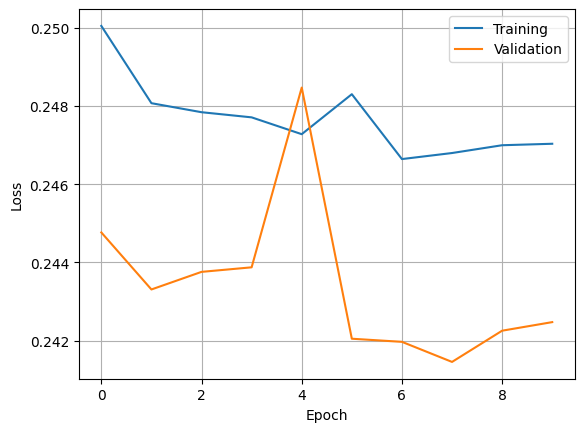

In [42]:
plt.plot(history_fit.history['loss'], label="Training")
plt.plot(history_fit.history['val_loss'], label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.legend()

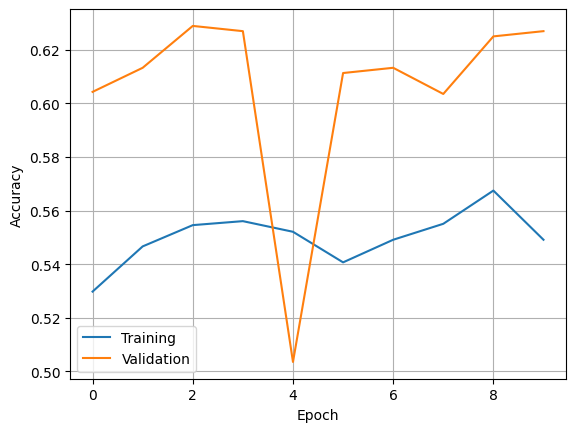

In [43]:
plt.plot(history_fit.history['binary_accuracy'], label="Training")
plt.plot(history_fit.history['val_binary_accuracy'], label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

In [45]:
# Choose how many events you want to test
testing_size = 1000

# Let's build a balanced testing sample
#test_bsample = testData[testData.Jet_LABEL == 0].sample(testing_size//2)
#test_bbarsample = testData[testData.Jet_LABEL == 1].sample(testing_size//2)

#testing_sample = pd.concat([test_bsample,test_bbarsample]).sample(frac=1.0)

test_X = testData[variables[:-1]]
test_Y = testData[variables[-1]]

# And let's predict the label with our trained model
test_predY= model.predict(test_X)
testData['RawPred'] = test_predY
testData['Jet_PREDLABEL'] = np.round(test_predY)

16/16 [==============================] - 149s 9s/step


In [47]:
testData.to_csv("test_data_predicted.csv",index=False)

[]

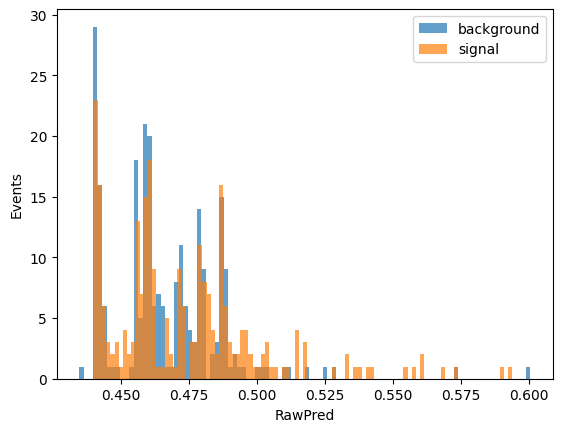

In [50]:
plt.hist(testData[testData['is_signal_new'] == 0]['RawPred'],bins=100,alpha=0.7,label="background")
plt.hist(testData[testData['is_signal_new'] == 1]['RawPred'],bins=100,alpha=0.7,label="signal")
plt.xlabel("RawPred")
plt.ylabel("Events")
plt.legend()
plt.plot()

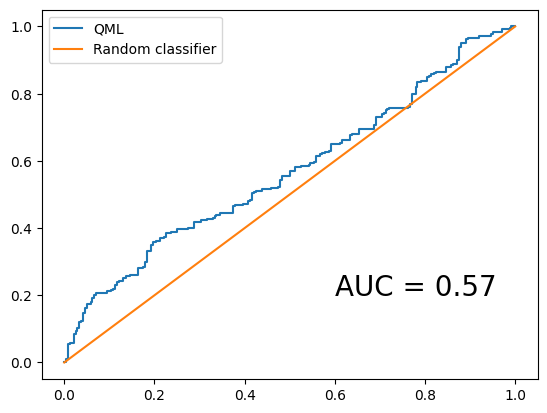

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr,tpr, _ = roc_curve(testData['is_signal_new'],testData['RawPred'])
auc = roc_auc_score(testData['is_signal_new'],testData['RawPred'])
plt.plot(fpr,tpr,label='QML')
plt.plot([0,1],[0,1], label='Random classifier')
plt.text(0.6,0.2,f"AUC = {auc:.2}",fontsize=20)
plt.legend()